# Импорт библиотек

In [2]:
# импортируем библиотеки
import pandas as pd # https://pandas.pydata.org/docs/reference/frame.html#dataframe

# Типы данных

### DataFrame

**Датафрейм** - это двухмерная структура, у неё есть колонки и строки. У колонок есть названия, а у строки — индекс (неформально говоря, номер).

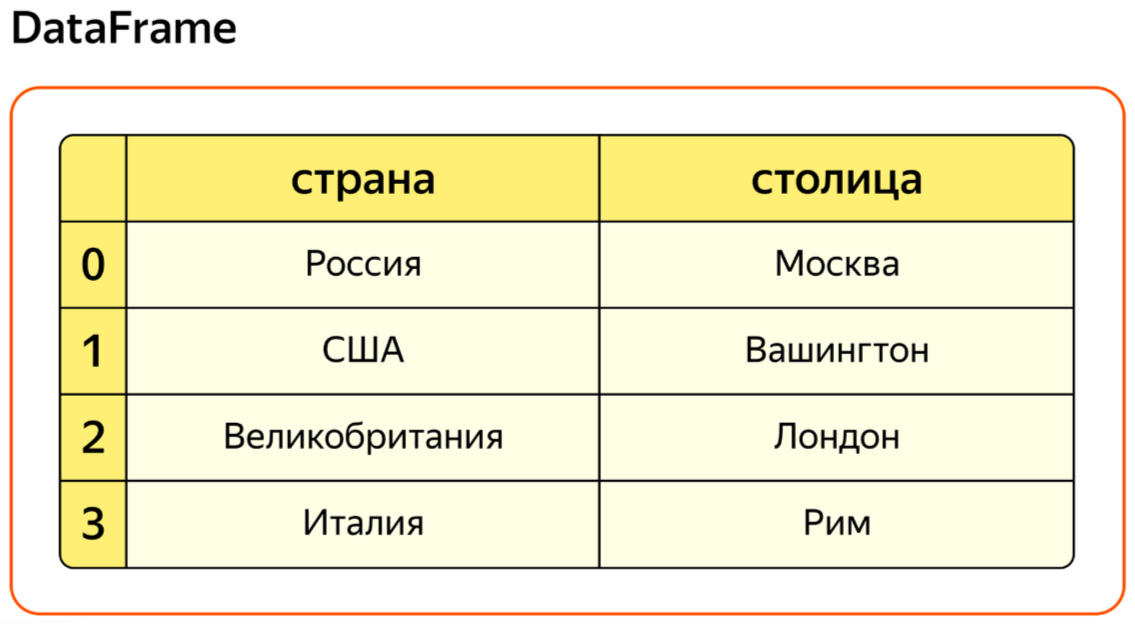

### Series

Объект датафрейм состоит из объектов типа серия. Если мы обратимся к конкретной колонке или строке датафрейма, то будем работать уже с объектом типа серия.

У серий есть несколько атрибутов, основные — два:   
* название name  
* тип объектов в ячейках dtype (англ. data type — тип данных).

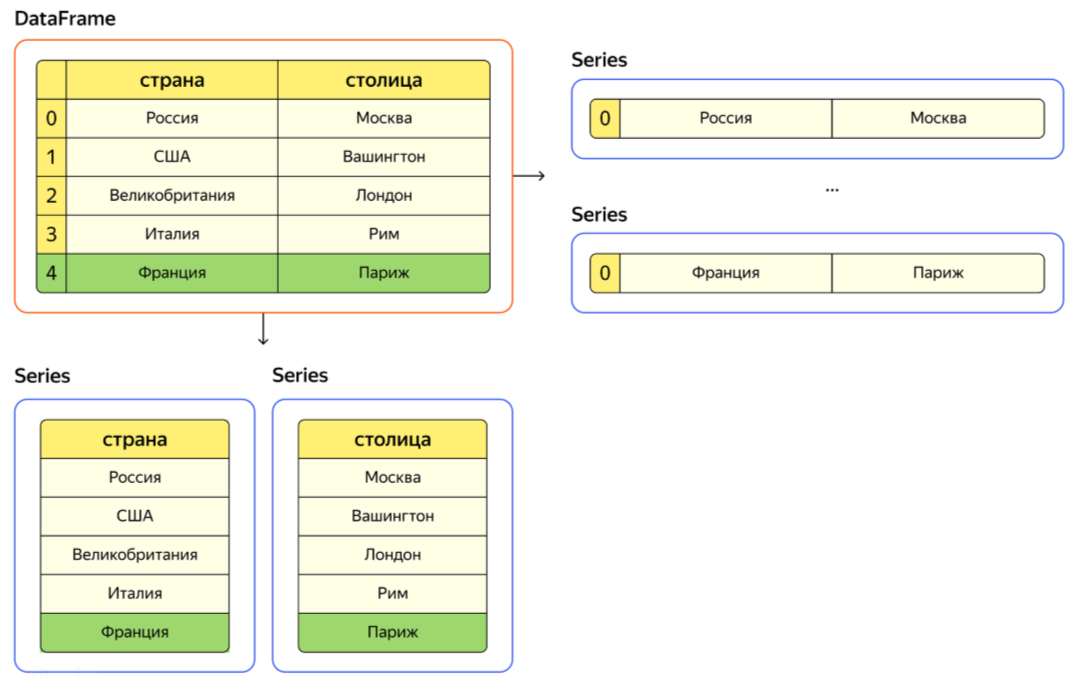

## Создание и наполнение DataFrame вручную

In [3]:
# Создадим пустой DataFrame
df = pd.DataFrame()
print(f'{df}\n{type(df)}')

Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>


**Дополнительные параметры**  
При создании датафрейма, мы можем указать специальные параметры. Они определяют то, какие данные и каким именно образом будут храниться в датафрейме:  
* data — содержимое DataFrame;  
* index — значения индексов в DataFrame;  
* columns — название колонок в DataFrame.  
Представить это можно примерно так:

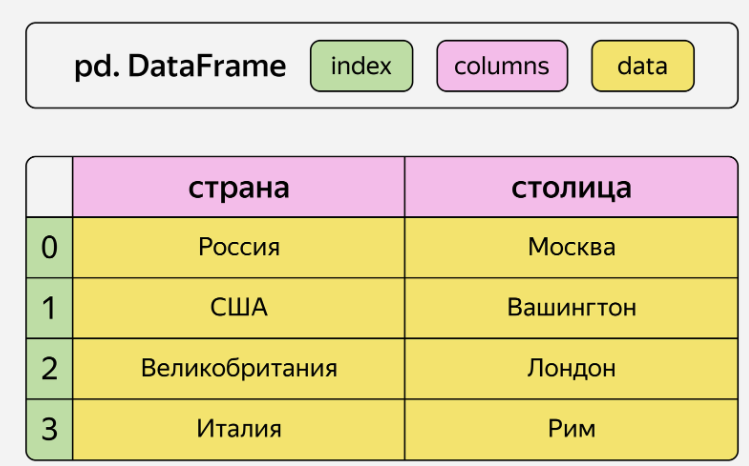

In [4]:
# создаем пустой DataFrame
df_countries = pd.DataFrame()

# создаем Series для наполнения DataFrame
country = pd.Series(['Россия', 'США', 'Великобритания', 'Италия'])
capital = pd.Series(['Москва', 'Вашингтон', 'Лондон', 'Рим'])

In [5]:
# передаем в DataFrame поля
df_countries['Страна'] = country # в квадратных скобках указываем название будущего поля
df_countries['Столица'] = capital

# смотрим на данные
display(df_countries)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


**Повторим алгоритм:**  
1) Создать пустой датафрейм.  
2) Создать объекты Series под каждую колонку.  
3) Присвоить каждой колонке свой Series.  

Всё то же самое можно сделать и без объектов Series, а используя лишь списки. Такой способ тоже правильный и на практике он встречается чаще, так как код выглядит проще:

In [6]:
df_countries_2 = pd.DataFrame()

df_countries_2['Страна'] = ['Россия', 'США', 'Великобритания', 'Италия']
df_countries_2['Столица'] = ['Москва', 'Вашингтон', 'Лондон', 'Рим']

display(df_countries_2)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


## Наполнение DataFrame на основе списка

Один из способов представить данные в табличном виде — это использовать вложенные списки. Ещё их называют двумерными. 

In [7]:
list_countries = [['Россия', 'Москва'], 
                  ['США', 'Вашингтон'], 
                  ['Великобритания', 'Лондон'], 
                  ['Италия', 'Рим']]

Представьте, что вы работаете со списком, где каждый элемент — это строка в таблице. Каждый вложенный список является очередной строкой в датафрейме, а значения в нём разделены по колонкам. 

In [8]:
# передаем в DataFrame в параметр data наш список списков
df_countries_3 = pd.DataFrame(data = list_countries)

# равнозначно предыдущему
df_countries_4 = pd.DataFrame(list_countries)

# возвращаем результаты
display(df_countries_3)
display(df_countries_4)

,0,1
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


,0,1
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


Итак, мы наполнили датафрейм значениями, но у колонок нет названий, вместо них числа 0 и 1. Добавим названия наших колонок, используя параметр columns

In [9]:
# Создаем DataFrame из списка списков и даем имена полям
df_countries_3 = pd.DataFrame(data = list_countries, columns = ['Страна', 'Столица'])

# выводим результат
display(df_countries_3)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


Ещё один способ дать названия колонкам — обратиться к атрибуту columns в датафрейме. Этот атрибут хранит названия для колонок в виде списка.

In [10]:
df_countries_3.columns = ['Country', 'Capital']

display(df_countries_3)

,Country,Capital
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


Если мы пропустим элемент в списке, то в датафрейм запишется пустое значение или None, при этом ошибки не будет и программа не остановится:

In [11]:
list_countries_2 = [['Россия', 'Москва'],
                  ['Вашингтон'], # Пропустили США
                  ['Великобритания', 'Лондон'],
                  ['Италия']] # Пропустили Рим

df_countries_4 = pd.DataFrame(data=list_countries_2, columns=['Страна', 'Столица'])

display(df_countries_4) 

,Страна,Столица
0,Россия,Москва
1,Вашингтон,None
2,Великобритания,Лондон
3,Италия,None


## Наполнение DataFrame на основе словаря

Разберём способ «ключ — колонка». В нём ключи словаря — это названия колонок, а значения — набор значений в колонке. Вы уже знаете, что Series подходит для хранения значений в колонке. 

In [12]:
# создаем словарь по методу "Ключ - Колонка"
dict_countries = {
    'Страна' : pd.Series(['Россия', 'США', 'Великобритания', 'Италия']),
    'Столица' : pd.Series(['Москва', '', 'Лондон', 'Рим'])
}

In [13]:
# передаем словарь в аргумент data
df_countries_5 = pd.DataFrame(data = dict_countries)

# смотрим на данные
display(df_countries_5)

,Страна,Столица
0,Россия,Москва
1,США,
2,Великобритания,Лондон
3,Италия,Рим


Попробуем передать разные типы данных 

In [14]:
# создаем словарь
dict_data_types = {
    'Строка': ['Иван', 'Август', 'Автомобиль'],
    'Целое число' : ['1', '3', '5'],
    'Десятичное число' : ['0.5', '1.2', '3.14'],
    'Логический тип данных' : [True, True, False]
}

# передаем словарь в аргумент data
df_data_types = pd.DataFrame(data = dict_data_types)

# смотрим на данные
display(df_data_types)

,Строка,Целое число,Десятичное число,Логический тип данных
0,Иван,1,0.5,True
1,Август,3,1.2,True
2,Автомобиль,5,3.14,False


Рассмотрим ещё один способ сохранить данные на основе словаря. Используем список, где каждый элемент — строка таблицы в виде словаря. Ключ словаря — название колонки, значение — значение колонки для этой строки. Получается набор записей.

In [15]:
# создаем словарь
dict_countries_2 = [
    {'Страна' : 'Россия', 'Столица' : 'Москва'},
    {'Страна' : 'США', 'Столица' : 'Вашингтон'},
    {'Страна' : 'Великобритания', 'Столица' : 'Лондон'},
    {'Страна' : 'Италия', 'Столица' : 'Рим'},
]

# передаем словарь в аргумент data
df_countries_6 = pd.DataFrame(data = dict_countries_2)

# смотрим на данные
display(df_countries_6)

,Страна,Столица
0,Россия,Москва
1,США,Вашингтон
2,Великобритания,Лондон
3,Италия,Рим


# Выгрузка датафрейма из файла

### CSV 

In [16]:
# выгрузим csv файл и создадим на ег ооснове DataFrame
df_art_1 = pd.read_csv('datasets/arts.csv')

# вглянем на данные в csv файле
display(df_art_1)

,Картина,Автор,Год
0,Звёздная ночь,Ван Гог Винсент,1889
1,Крик,Мунк Эдвард,1910
2,Неизвестная,Крамской Иван,1883
3,Итальянский полдень,Брюллов Карл,1827
4,Рожь,Шишкин Иван,1878
5,Девятый вал,Айвазовский Иван,1850


При использовании функции ```read_csv()``` можно указать параметр ```sep```, который определяет символ, используемый в качестве разделителя. Поскольку **CSV**-файлы по умолчанию используют запятую в качестве разделителя, её можно не указывать явно.  

Аргумент ```index_col``` в функции ```pd.read_csv()``` позволяет указать, какой столбец следует использовать в качестве индекса **DataFrame**.

```df = pd.read_csv('file.csv', index_col='имя_столбца')```

In [17]:
# взглянем на типы данных в колонках DataFrame

print(df_art_1.dtypes)

Картина    object
Автор      object
Год         int64
dtype: object


Рассмотрим пример разделения записей в DataFrame чем-то иным чем запятой

In [18]:
# прочитаем csv
df_art_2 = pd.read_csv('datasets/arts2.csv')

# посмотрим на данные
display(df_art_2)

# записи разделены табуляцией

,Картина\tАвтор\tГод
0,Звёздная ночь\tВан Гог Винсент\t1889
1,Крик\tМунк Эдвард\t1910
2,Неизвестная\tКрамской Иван\t1883
3,Итальянский полдень\tБрюллов Карл\t1827
4,Рожь\tШишкин Иван\t1878
5,Девятый вал\tАйвазовский Иван\t1850


In [19]:
# прочитаем csv с указанием разделителя
df_art_3 = pd.read_csv('datasets/arts2.csv', sep = '\t')

# посмотрим на данные
print(df_art_3)

                       Картина\tАвтор\tГод
0     Звёздная ночь\tВан Гог Винсент\t1889
1                  Крик\tМунк Эдвард\t1910
2         Неизвестная\tКрамской Иван\t1883
3  Итальянский полдень\tБрюллов Карл\t1827
4                  Рожь\tШишкин Иван\t1878
5      Девятый вал\tАйвазовский Иван\t1850


# Знакомство с данными

### Взгляд на данные

In [20]:
# прочитаем еще один датасет
example = pd.read_csv('datasets/sales.csv')

# взгляем на первые 3 строки
example.head(3)

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88


In [21]:
# взгляем на последние 4 строки
example.tail(3)

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
997,952,PG2,5388,37.71,61.74,331,1041
998,1307,PG2,44996,31.44,42.74,1772,6394
999,3018,PG5,1697,4.68,18.99,19,52


In [22]:
# посмотрим на 5 случайных строчек
example.sample(5)

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
950,2624,PG6,1485,2.78,6.64,24,98
297,2570,PG2,2911,4.07,9.49,158,591
436,8667,PG5,1204,34.10,51.29,112,532
140,1966,PG4,1063,4.83,14.24,27,97
430,9808,PG4,498,1.87,2.37,12,65


### Определение размера DataFrame

In [23]:
# выведем информация о размере DataFrame
example.shape

(1000, 7)

In [24]:
# лучше так
print(f'DataFrame example содержит {example.shape[0]} строк и {example.shape[1]} полей')

DataFrame example содержит 1000 строк и 7 полей


### Получаем всю важную информацию о DataFrame

In [25]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_code      1000 non-null   int64  
 1   product_group     1000 non-null   object 
 2   stock_qty         1000 non-null   int64  
 3   cost              1000 non-null   float64
 4   price             1000 non-null   float64
 5   last_week_sales   1000 non-null   int64  
 6   last_month_sales  1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


После применения метода ```info()``` мы получаем ценную информацию о структуре нашего датафрейма.   
* **RangeIndex** предоставляет сведения об индексах строк, включая их количество и диапазон значений. В нашем случае имеется 1000 строк с индексами от 0 до 999.  

* **Data columns** показывает количество столбцов и их характеристики. Для каждой колонки указан тип данных (Dtype) и количество непустых значений (Non-Null). Это помогает нам понять, какие данные хранятся в каждом столбце и насколько они полны.  

* **Memory usage** сообщает нам о том, сколько памяти занимает датафрейм. 

# Фильтрация данных в DataFrame

## Фильтрация по столбцам [ ]

In [26]:
# оставим лишь часть столбцов для анализа
example_f1 = example[['product_code', 'stock_qty', 'price']]

# взглянем на оставшиеся поля в DataFrame
display(example_f1.head())

,product_code,stock_qty,price
0,4187,498,569.91
1,4195,473,712.41
2,4204,968,854.91
3,4219,241,1034.55
4,4718,1401,26.59


При создании среза данных, если мы выбираем значения из одного столбца, результатом будет объект **Series**. Если же мы выбираем несколько столбцов, то результат будет представлен в виде **DataFrame**, поскольку набор из нескольких **Series** образует **DataFrame**. Это различие в типах данных позволяет эффективно обрабатывать и анализировать данные в зависимости от их структуры.

## Удаление столбцов. Метод .drop()

In [27]:
# оставим лишь часть столбцов для анализа
example_f2 = example.drop(columns = ['product_group', 'cost', 'last_week_sales', 'last_month_sales'])

# взглянем на оставшиеся поля в DataFrame
display(example_f2.head())

,product_code,stock_qty,price
0,4187,498,569.91
1,4195,473,712.41
2,4204,968,854.91
3,4219,241,1034.55
4,4718,1401,26.59


Если вы хотите сохранить результат фильтрации в исходном датафрейме, то метод ```.drop()``` позволяет это сделать, если указать параметр ```inplace=True```.  

При использовании параметра ```inplace=True``` с методом ```.drop()```, исходный **DataFrame** модифицируется напрямую, но метод не возвращает никакого результата, что делает невозможным использование цепочки методов. Например, если вы попытаетесь вызвать ```.head()``` после ```.drop(inplace=True)```, это приведет к ошибке, поскольку ```.drop(inplace=True)``` возвращает **None**, а у None нет метода ```.head()```.

## Фильтрация по строкам при помощи индексации

В библиотеке **pandas** доступно несколько способов индексации данных:

- **Оператор `[]`**:  
  Этот метод подходит для выполнения базовой индексации. Он позволяет обращаться к данным по числовым индексам строк или по названиям (меткам) столбцов.

- **Оператор `.loc[]`**:  
  Предназначен для индексации на основе меток. С его помощью можно выбирать данные, используя явные имена как для строк, так и для столбцов.

- **Оператор `.iloc[]`**:  
  Позволяет работать с данными через позиционную индексацию. Этот метод ориентируется исключительно на числовые индексы строк и столбцов.

## Фильтрация строк DataFrame [ ]

Для извлечения среза строк в DataFrame с использованием оператора `[]` применяется следующий формат:

```python
df[начало_интервала:конец_интервала]
```

In [28]:
# выведем первые 5 строк DataFrame с информацией о продажах
display(example[0:5]) # права граница диапазона не учитывается

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88
3,4219,PG2,241,869.69,1034.55,14,45
4,4718,PG2,1401,12.54,26.59,50,285


In [29]:
# елси выводим строки начиная с первой то первое значение интервала можно опустить
display(example[:5])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88
3,4219,PG2,241,869.69,1034.55,14,45
4,4718,PG2,1401,12.54,26.59,50,285


In [30]:
# аналогично работает с правой границей диапазона, вернем 5 последних строк
display(example[-5:])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
995,8048,PG4,415,11.99,11.39,28,60
996,8050,PG4,-10,1.32,3.32,14,11
997,952,PG2,5388,37.71,61.74,331,1041
998,1307,PG2,44996,31.44,42.74,1772,6394
999,3018,PG5,1697,4.68,18.99,19,52


In [31]:
# можно выбрать все строки начиная с заданной, например с 995 строки
display(example[995:])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
995,8048,PG4,415,11.99,11.39,28,60
996,8050,PG4,-10,1.32,3.32,14,11
997,952,PG2,5388,37.71,61.74,331,1041
998,1307,PG2,44996,31.44,42.74,1772,6394
999,3018,PG5,1697,4.68,18.99,19,52


In [32]:
# Или любой произвольный интервал
display(example[100:105])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
100,5719,PG6,2124,10.78,18.99,75,301
101,5721,PG6,1734,12.54,22.79,25,95
102,3721,PG4,585,7.15,14.24,31,101
103,5211,PG4,1269,68.52,94.91,48,183
104,728,PG4,701,9.24,17.09,12,47


Если бы обратимся к df таким образом ```[10]```, желая получить 10 строку то получим ошибку. В таком формате df ожидает обращение к колонке, а т.к. колонки с именем 10 нет мы получаем ошибку. Для получения одной строки мы должны использовать срез данных как в примере.

In [33]:
# возвращаем 10 строку
display(example[10:11])

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
10,5649,PG4,360,6.26,13.29,32,79


In [34]:
# так, используя оба вида индексации [] и [:] возвращаем первые 5 строк колонки cost
display(example[:5]['cost']) # можно менять местами [] и [:]

0    420.76
1    545.64
2    640.42
3    869.69
4     12.54
Name: cost, dtype: float64

In [35]:
# давайте выведем первые 5 позиций по стоимости

col = ['product_code', 'product_group', 'price'] # оставим необходимые поля

example_top_5 = example[col].sort_values(by = 'price', ascending = False)

display(example_top_5[0:5])

,product_code,product_group,price
528,9692,PG1,1500.05
565,7773,PG1,1325.16
710,4140,PG1,1201.75
599,1941,PG1,1177.05
3,4219,PG2,1034.55


Для упорядочивания данных мы применили метод `.sort_values()`. В качестве ключевого параметра был задан `by = 'price'`, который указывает, по каким столбцам будет выполняться сортировка. 

По умолчанию данный метод располагает значения в порядке возрастания — от минимального к максимальному. Однако, если требуется обратный порядок, то есть от большего к меньшему, следует использовать дополнительный параметр `ascending = False`.

**Способы выборки (среза) данных в pandas с использованием оператора `[]`**

| **Описание**                     | **Синтаксис**                              | **Примечание**                                                                 |
|----------------------------------|-------------------------------------------|--------------------------------------------------------------------------------|
| **Один столбец (Series)**        | `df['column']`                            | Результатом будет объект типа `Series`, содержащий данные указанного столбца.   |
| **Один столбец (DataFrame)**     | `df[['column']]`                          | Результатом будет объект типа `DataFrame`, даже если выбран только один столбец.|
| **Несколько столбцов**           | `df[['column_A', 'column_B']]`            | Для выбора нескольких столбцов используется список названий столбцов.          |
| **Все строки, начиная с заданной**| `df[0:]`                                  | Выбираются все строки, начиная с индекса `0`.                                   |
| **Все строки до заданной**       | `df[:5]`                                  | Выбираются строки с начала DataFrame до индекса `5` (не включая его).           |
| **Срез строк**                   | `df[2:5]`                                 | Выбираются строки с индексами от `2` до `4` (индекс `5` не включается).         |
| **Одна строка**                  | `df[4:5]`                                 | Выбирается одна строка с индексом `4` (используется срез для сохранения типа DataFrame). |
| **Одна ячейка**                  | `df[4:5]['column']`                       | Выбирается значение одной ячейки на пересечении строки с индексом `4` и столбца `'column'`. |

***Важные замечания***:  
- Оператор `[]` позволяет работать с данными на основе их позиций или меток, но имеет ограничения. Например, он не поддерживает одновременный выбор строк и столбцов по меткам.
- Для более сложных сценариев рекомендуется использовать методы `.loc[]` (по меткам) или `.iloc[]` (по индексам).
- При выборе одной строки срезом (`df[4:5]`) результат остается объектом типа `DataFrame`, что удобно для дальнейших манипуляций.

## Индексация и условные выражения

### Логическая маска

In [36]:
# подсключаем csv с информацией о продажах
df_g = pd.read_csv('datasets/grocery.csv')

# смотрим на датасет
display(df_g.head())

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
0,1102,orange,fruit,2021-11-12,2.60,30.0,kg
1,1003,onion,vegetable,2021-11-28,2.29,38.0,kg
2,1202,yogurt-1kg,dairy,2021-11-30,6.90,37.0,pcs
3,1103,apple,fruit,2021-11-13,1.90,20.0,kg
4,1001,tomato,vegetable,2021-11-24,2.89,39.0,kg


In [37]:
# добавляем маску по группе продукта, чтобы выбрать только фрукты
display(df_g[df_g['product_group'] == 'fruit'].head())

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
0,1102,orange,fruit,2021-11-12,2.6,30.0,kg
3,1103,apple,fruit,2021-11-13,1.9,20.0,kg
6,1104,grape,fruit,2021-11-21,4.4,28.0,kg
10,1103,apple,fruit,2021-11-29,2.2,33.0,kg
13,1101,plum,fruit,2021-11-01,4.5,27.0,kg


In [38]:
# выведем отдельно саму маску (булевая, логическая маска)
display(df_g['product_group'] == 'fruit')

0      True
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14     True
15     True
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29     True
30     True
31    False
32     True
33    False
34    False
Name: product_group, dtype: bool

Таким образм задаем условие ```df_g['product_group'] == 'fruit'```, которое отрабатывает построчно и возвращает True, в случае если значение в поле 'product_group' равно 'fruit' и значение False в противном случае.

При создании логической маски можно использовать любые логические операторы:  ```==```,  ```!=```, ```>```, ```<```, ```>=```, ```<=```

In [39]:
# ==
display(df_g[df_g['product_code'] == 1102])

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
0,1102,orange,fruit,2021-11-12,2.6,30.0,kg
19,1102,orange,fruit,2021-11-06,2.6,37.0,kg
29,1102,orange,fruit,2021-11-03,2.6,35.0,kg


In [40]:
# !=
display(df_g[df_g['product_code'] != 1102].head())

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
1,1003,onion,vegetable,2021-11-28,2.29,38.0,kg
2,1202,yogurt-1kg,dairy,2021-11-30,6.90,37.0,pcs
3,1103,apple,fruit,2021-11-13,1.90,20.0,kg
4,1001,tomato,vegetable,2021-11-24,2.89,39.0,kg
5,1001,tomato,vegetable,2021-11-26,2.89,21.0,kg


In [41]:
# >, <, >=, <=
display(df_g[df_g['price'] > 10])

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
7,1203,butter-0.25kg,dairy,2021-11-13,10.9,20.0,pcs
12,1203,butter-0.25kg,dairy,2021-11-19,10.9,36.0,pcs
31,1203,butter-0.25kg,dairy,2021-11-06,11.9,26.0,pcs


In [42]:
# использование нескольких условий (| - ИЛИ)
display(df_g[(df_g['product_description'] == 'tomato') | (df_g['sales_quantity'] == 21)])

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
4,1001,tomato,vegetable,2021-11-24,2.89,39.0,kg
5,1001,tomato,vegetable,2021-11-26,2.89,21.0,kg
8,1001,tomato,vegetable,2021-11-13,2.99,26.0,kg
28,1002,cucumber,vegetable,2021-11-18,4.49,21.0,kg
33,1001,tomato,vegetable,2021-11-23,3.49,27.0,kg


In [43]:
# использование нескольких условий (& - И)
display(df_g[(df_g['product_description'] == 'tomato') & (df_g['sales_quantity'] == 21)])

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
5,1001,tomato,vegetable,2021-11-26,2.89,21.0,kg


In [44]:
# можно создать специальную переменную для хранения маски фильтрации

#создаем маску для фильтрации
mask = (df_g['product_description'] == 'tomato') & (df_g['sales_quantity'] == 21)

# фильтруем даные используя маску 
display(df_g[mask])

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
5,1001,tomato,vegetable,2021-11-26,2.89,21.0,kg


In [45]:
# комбинирование маски с другими условиями фильтрации

mask = (df_g['product_code'] == 1001) | (df_g['product_description'] == 'tomato')

display(df_g[mask][2:4][['product_code', 'product_description', 'price']])

,product_code,product_description,price
8,1001,tomato,2.99
33,1001,tomato,3.49


## Фильтрация .loc, .iloc

Оператор [] в pandas позволяет фильтровать данные только по названиям столбцов или целочисленным индексам строк. Для одновременной фильтрации строк и столбцов требуется последовательное применение оператора.

In [46]:
# по строкам
display(df_g[3:5])

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
3,1103,apple,fruit,2021-11-13,1.90,20.0,kg
4,1001,tomato,vegetable,2021-11-24,2.89,39.0,kg


In [47]:
# по столбцам
display(df_g[['product_code', 'price']].head())

,product_code,price
0,1102,2.60
1,1003,2.29
2,1202,6.90
3,1103,1.90
4,1001,2.89


In [48]:
# по строкам и по столбцам
display(df_g[3:5][['product_code', 'price']])

,product_code,price
3,1103,1.90
4,1001,2.89


Синтаксис методов ```.loc[]``` и ```.iloc[]```
Оба метода используют одинаковый синтаксис для выбора данных:  
```df.метод[строки, столбцы]```, где:  

* Первый аргумент — выбор строк (метки для .loc[], позиции для .iloc[]).

* Второй аргумент — выбор столбцов (метки для .loc[], позиции для .iloc[]).

In [49]:
# используем метод .loc
display(df_g.loc[3:5, ['product_code', 'price']])

,product_code,price
3,1103,1.90
4,1001,2.89
5,1001,2.89


In [50]:
# используем метод .iloc
display(df_g.iloc[3:6, [0, 4]])

,product_code,price
3,1103,1.90
4,1001,2.89
5,1001,2.89


### Сравнение `.loc[]` и `.iloc[]` в pandas  

#### Основные различия  
| **Параметр**       | **.loc[]**                          | **.iloc[]**                         |
|---------------------|--------------------------------------|--------------------------------------|
| **Тип индексов**    | Метки (строки/столбцы)               | Позиции (целые числа)                |
| **Срезы**           | Включают конец                      | Исключают конец                     |
| **Логические условия** | Поддерживаются                     | Не поддерживаются                   |
| **Пример**          | Выбор по названиям столбцов          | Выбор по порядковым номерам         |

---

#### Ключевые особенности  
1. **.loc[]**  
   - **Метки**: работает с названиями строк/столбцов (например, `df.loc['row1', 'col1']`).  
   - **Условия**: фильтрует строки по логическим выражениям (например, `df.loc[df['age'] > 25]`).  
   - **Срезы**: инклюзивны (например, `df.loc[1:3]` → строки 1, 2, **3**).  

2. **.iloc[]**  
   - **Позиции**: использует целочисленные индексы (например, `df.iloc[1, 0]`).  
   - **Срезы**: эксклюзивны (например, `df.iloc[1:3]` → строки 1, **2**).  
   - **Эффективность**: быстрее для больших данных, так как не требует поиска меток[1][4].  

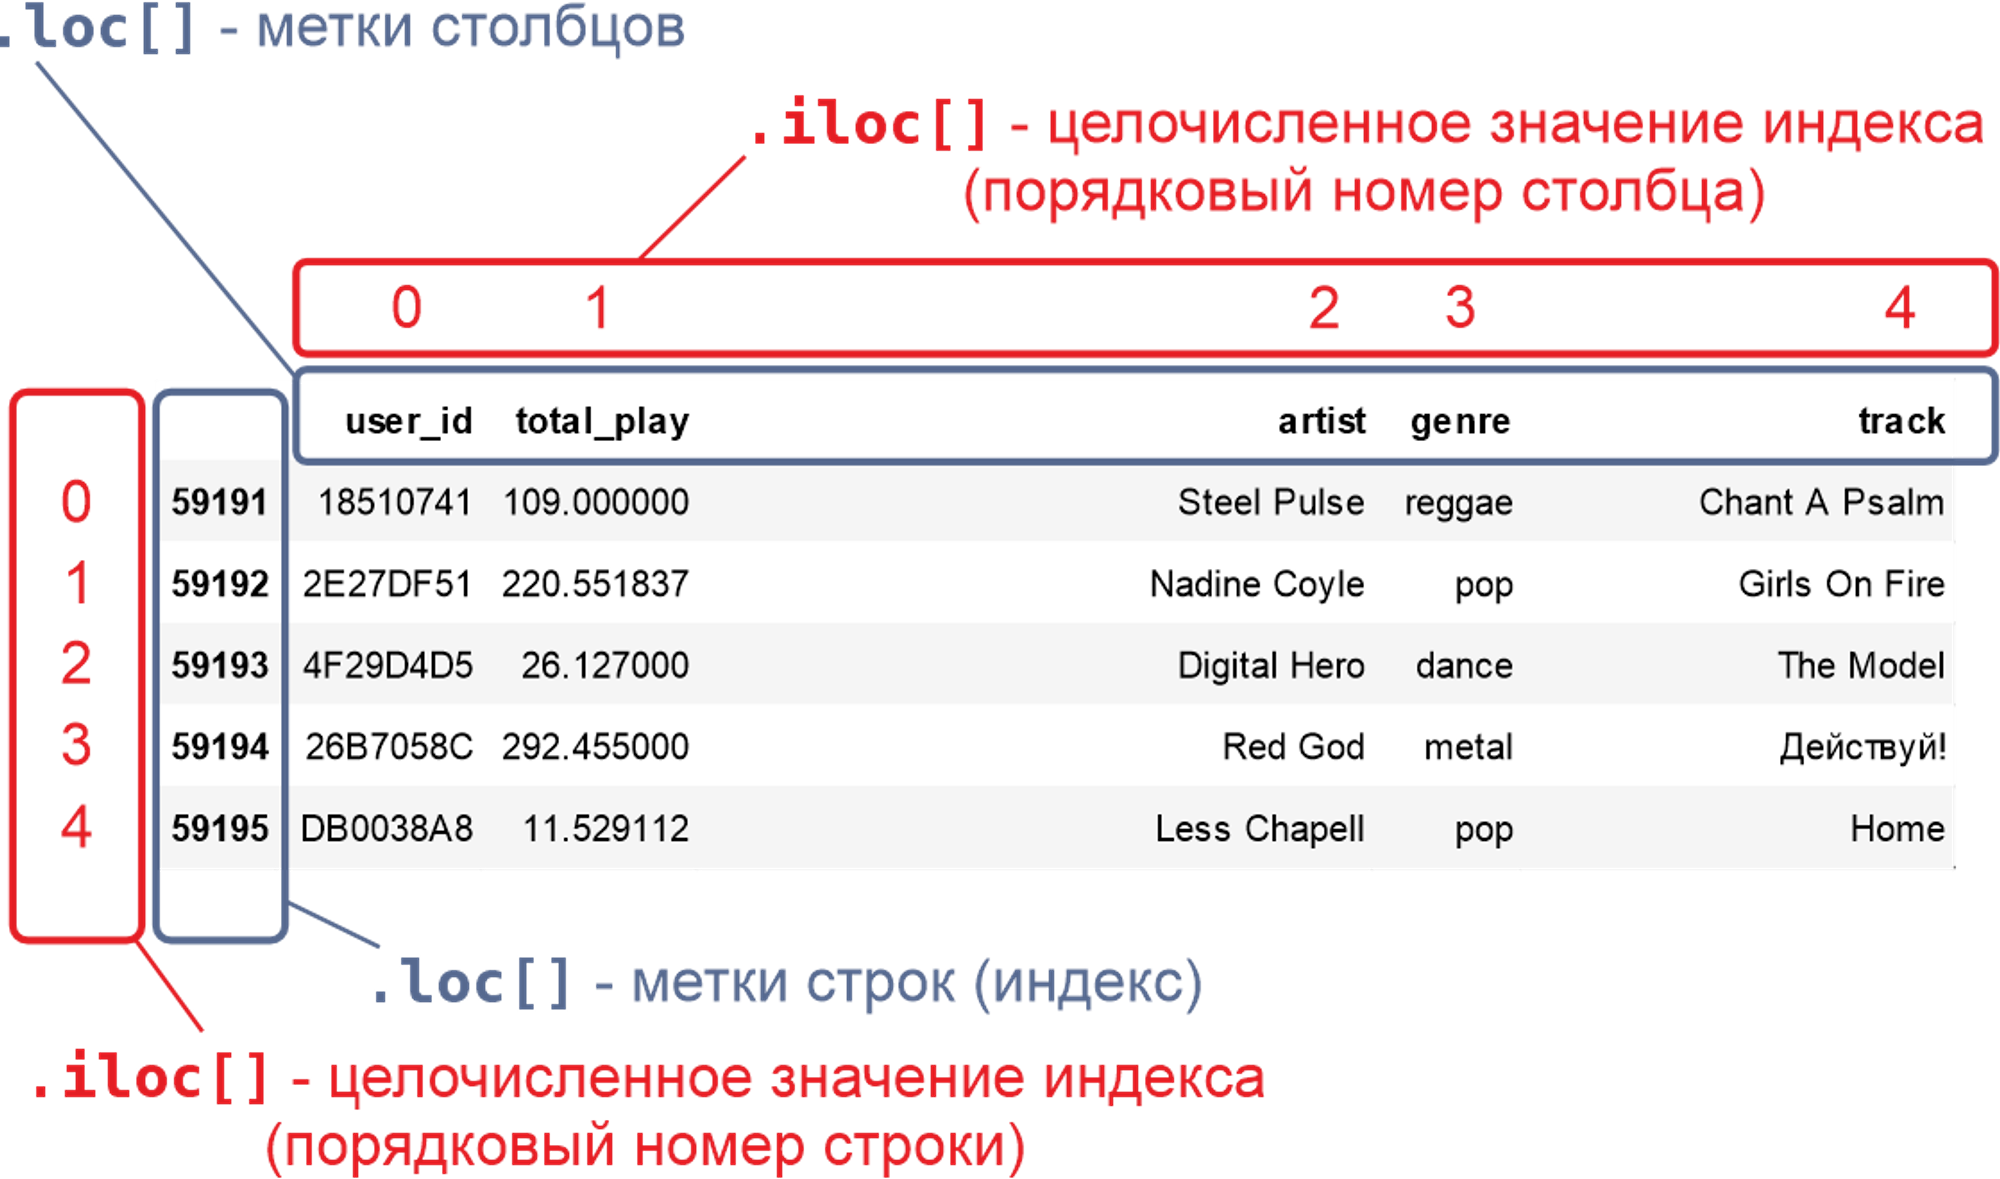

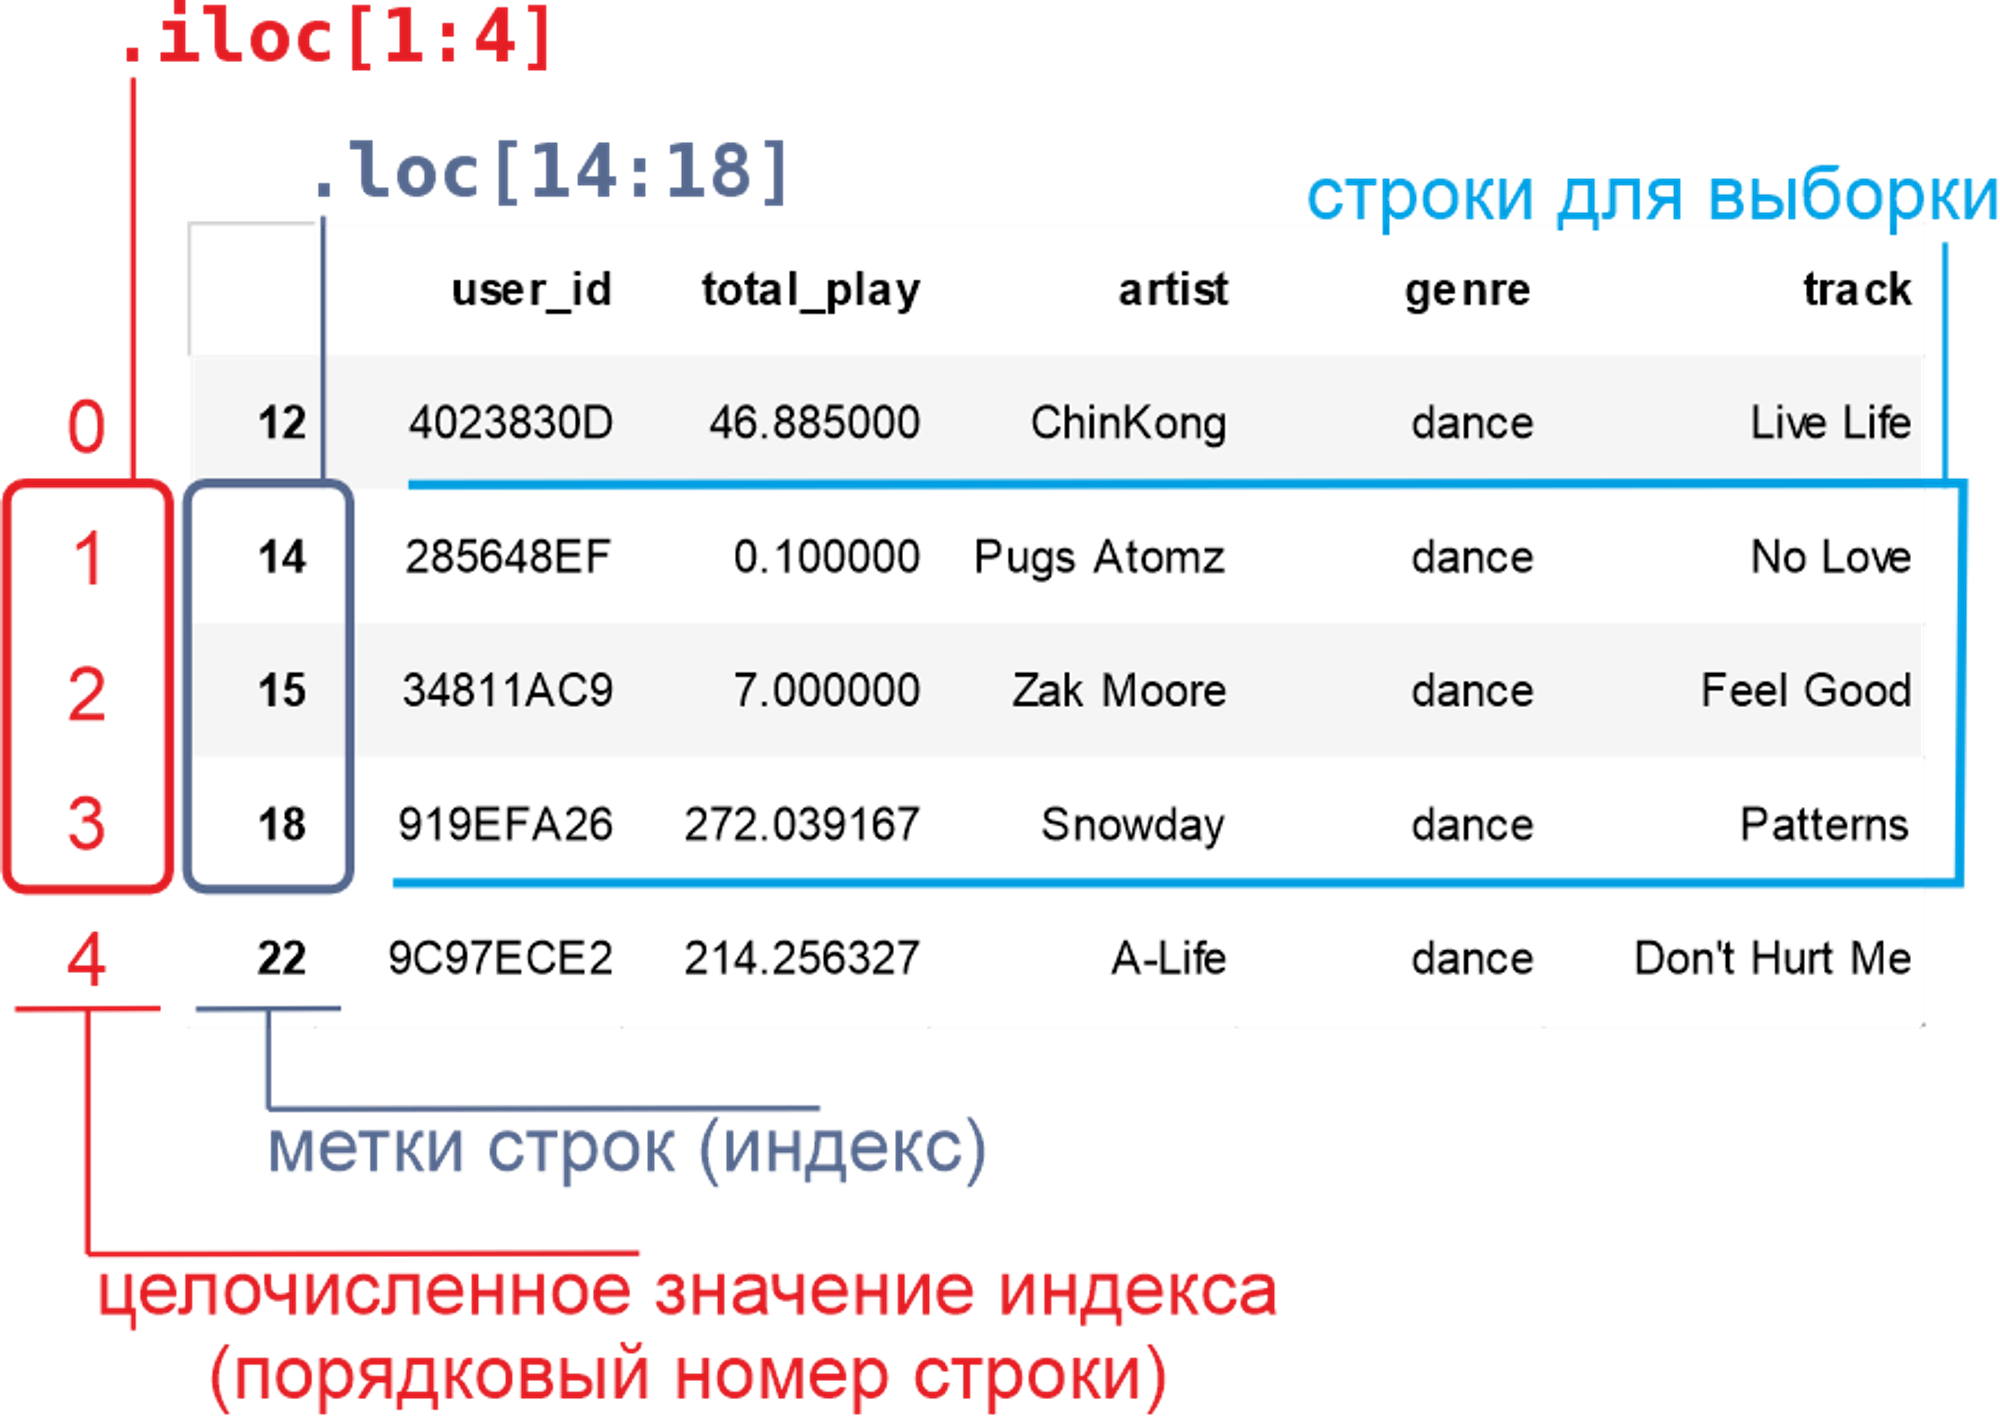

Для срезов с определённым количеством строк (от начала или конца данных) при использовании .loc[] требуется соответствие меток индексов их порядку. Если индексы были изменены (например, после сортировки или фильтрации), их порядок может не совпадать с исходным.

## Фильтрация столбцов .loc[], .iloc[]

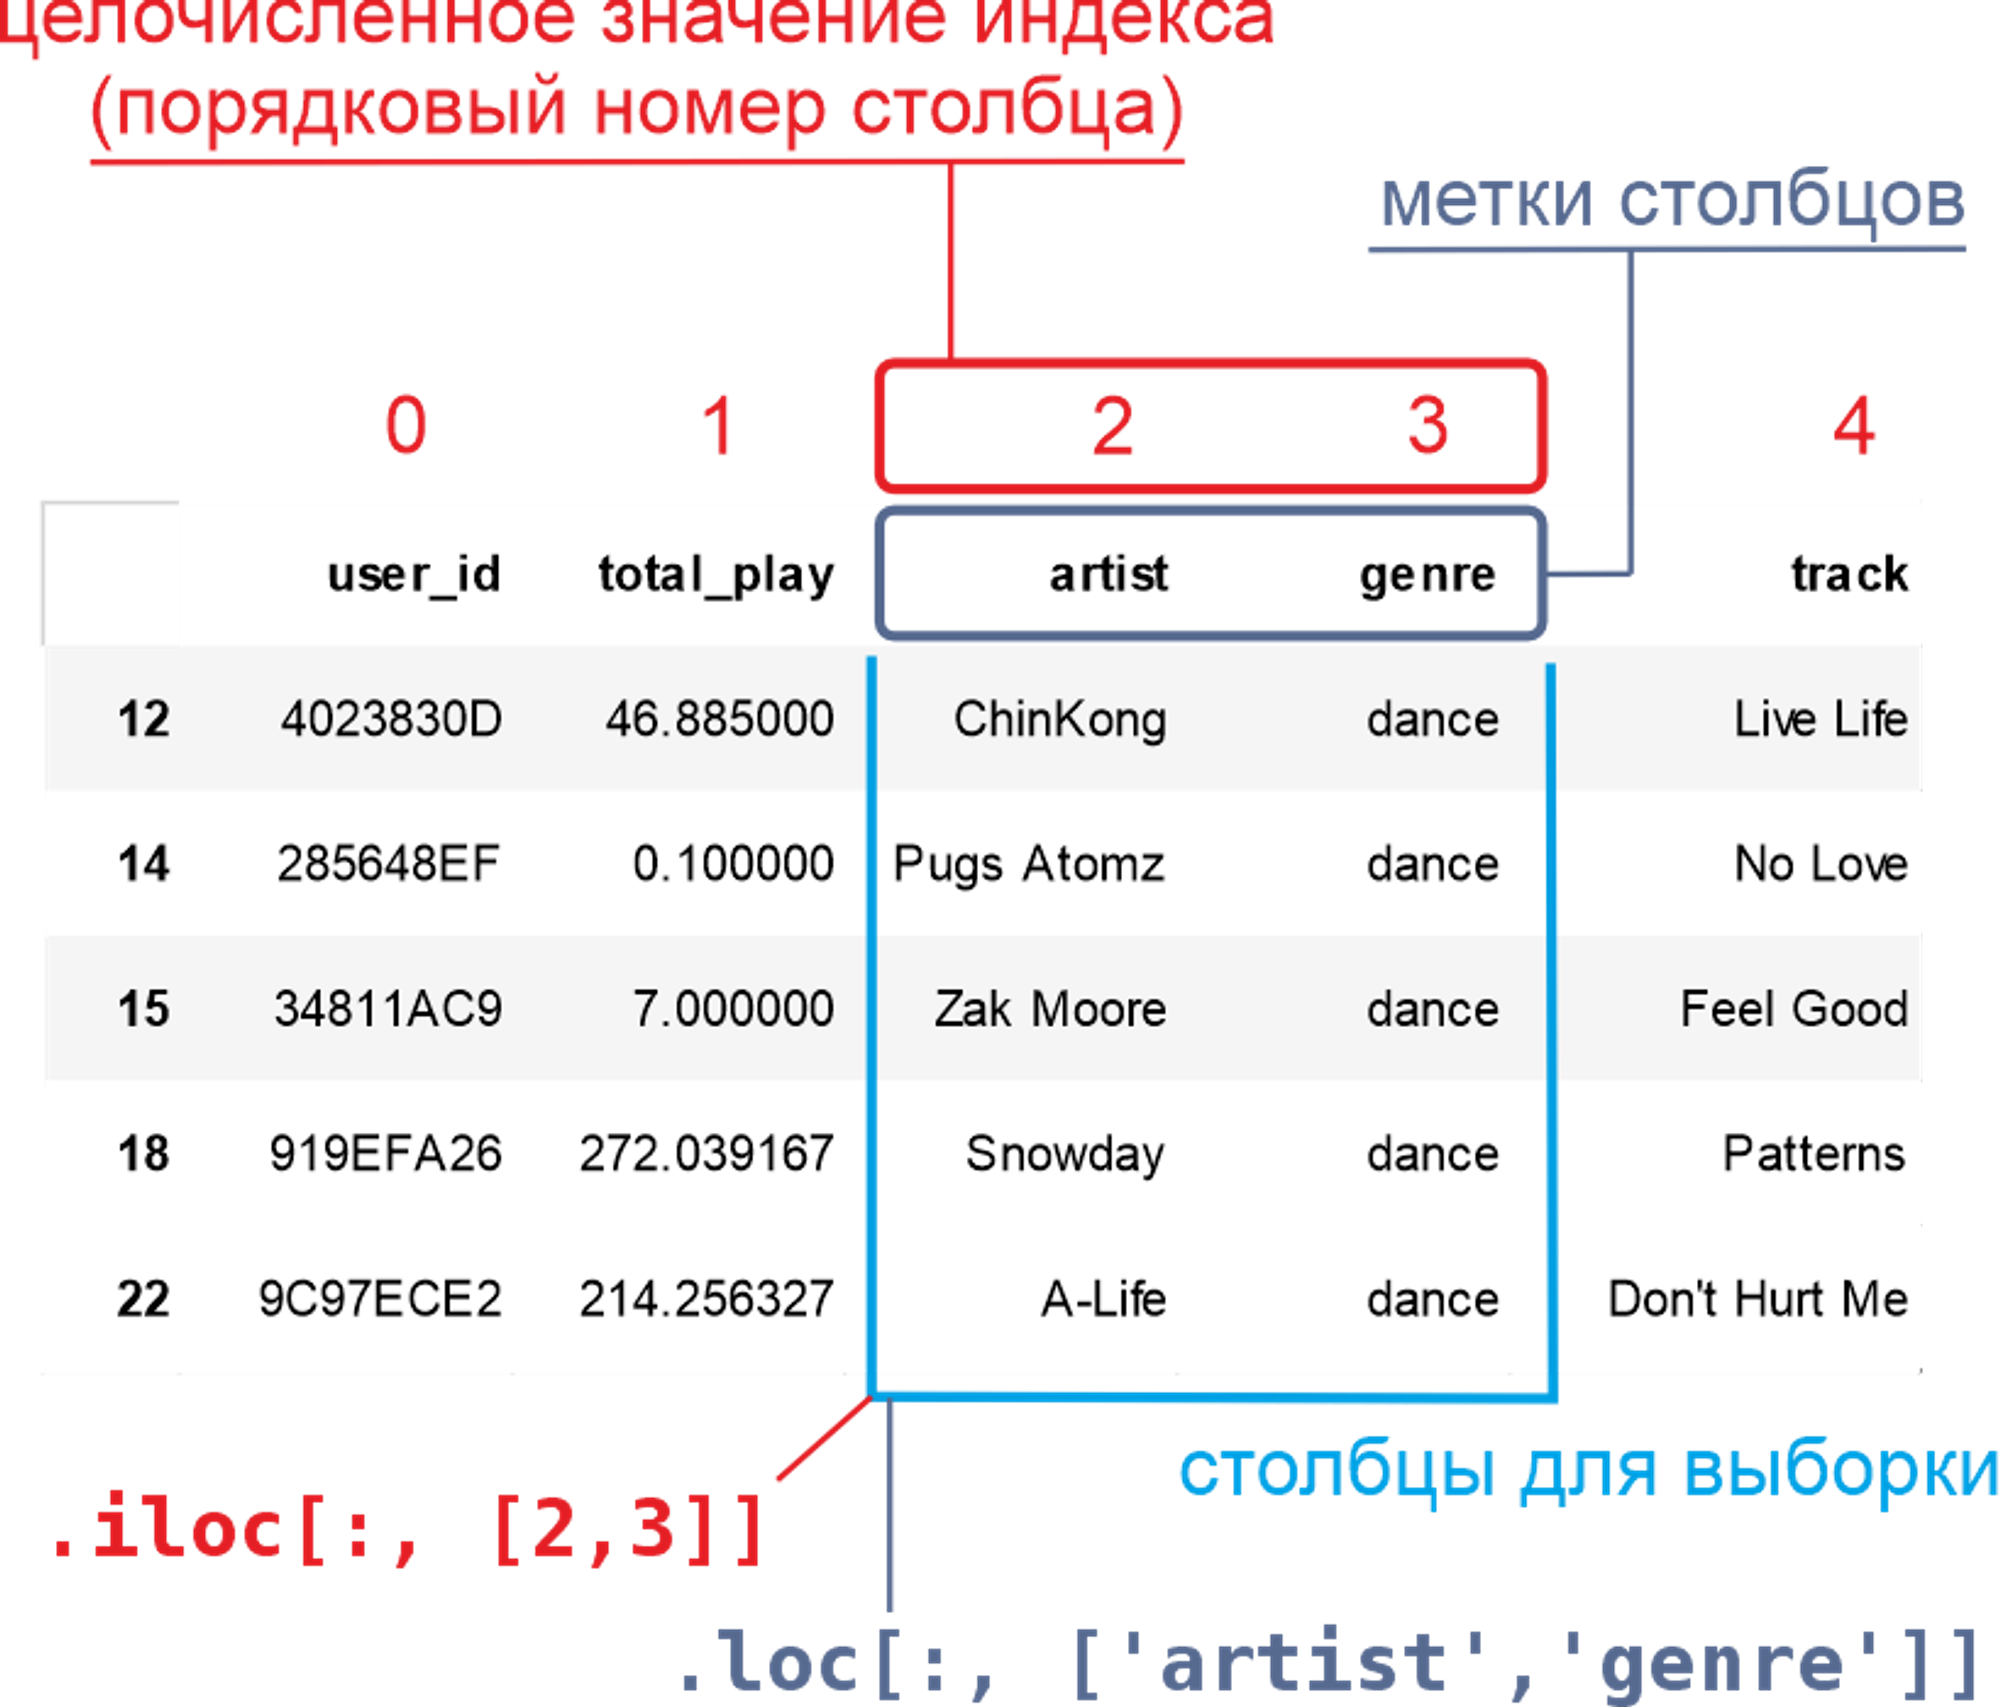

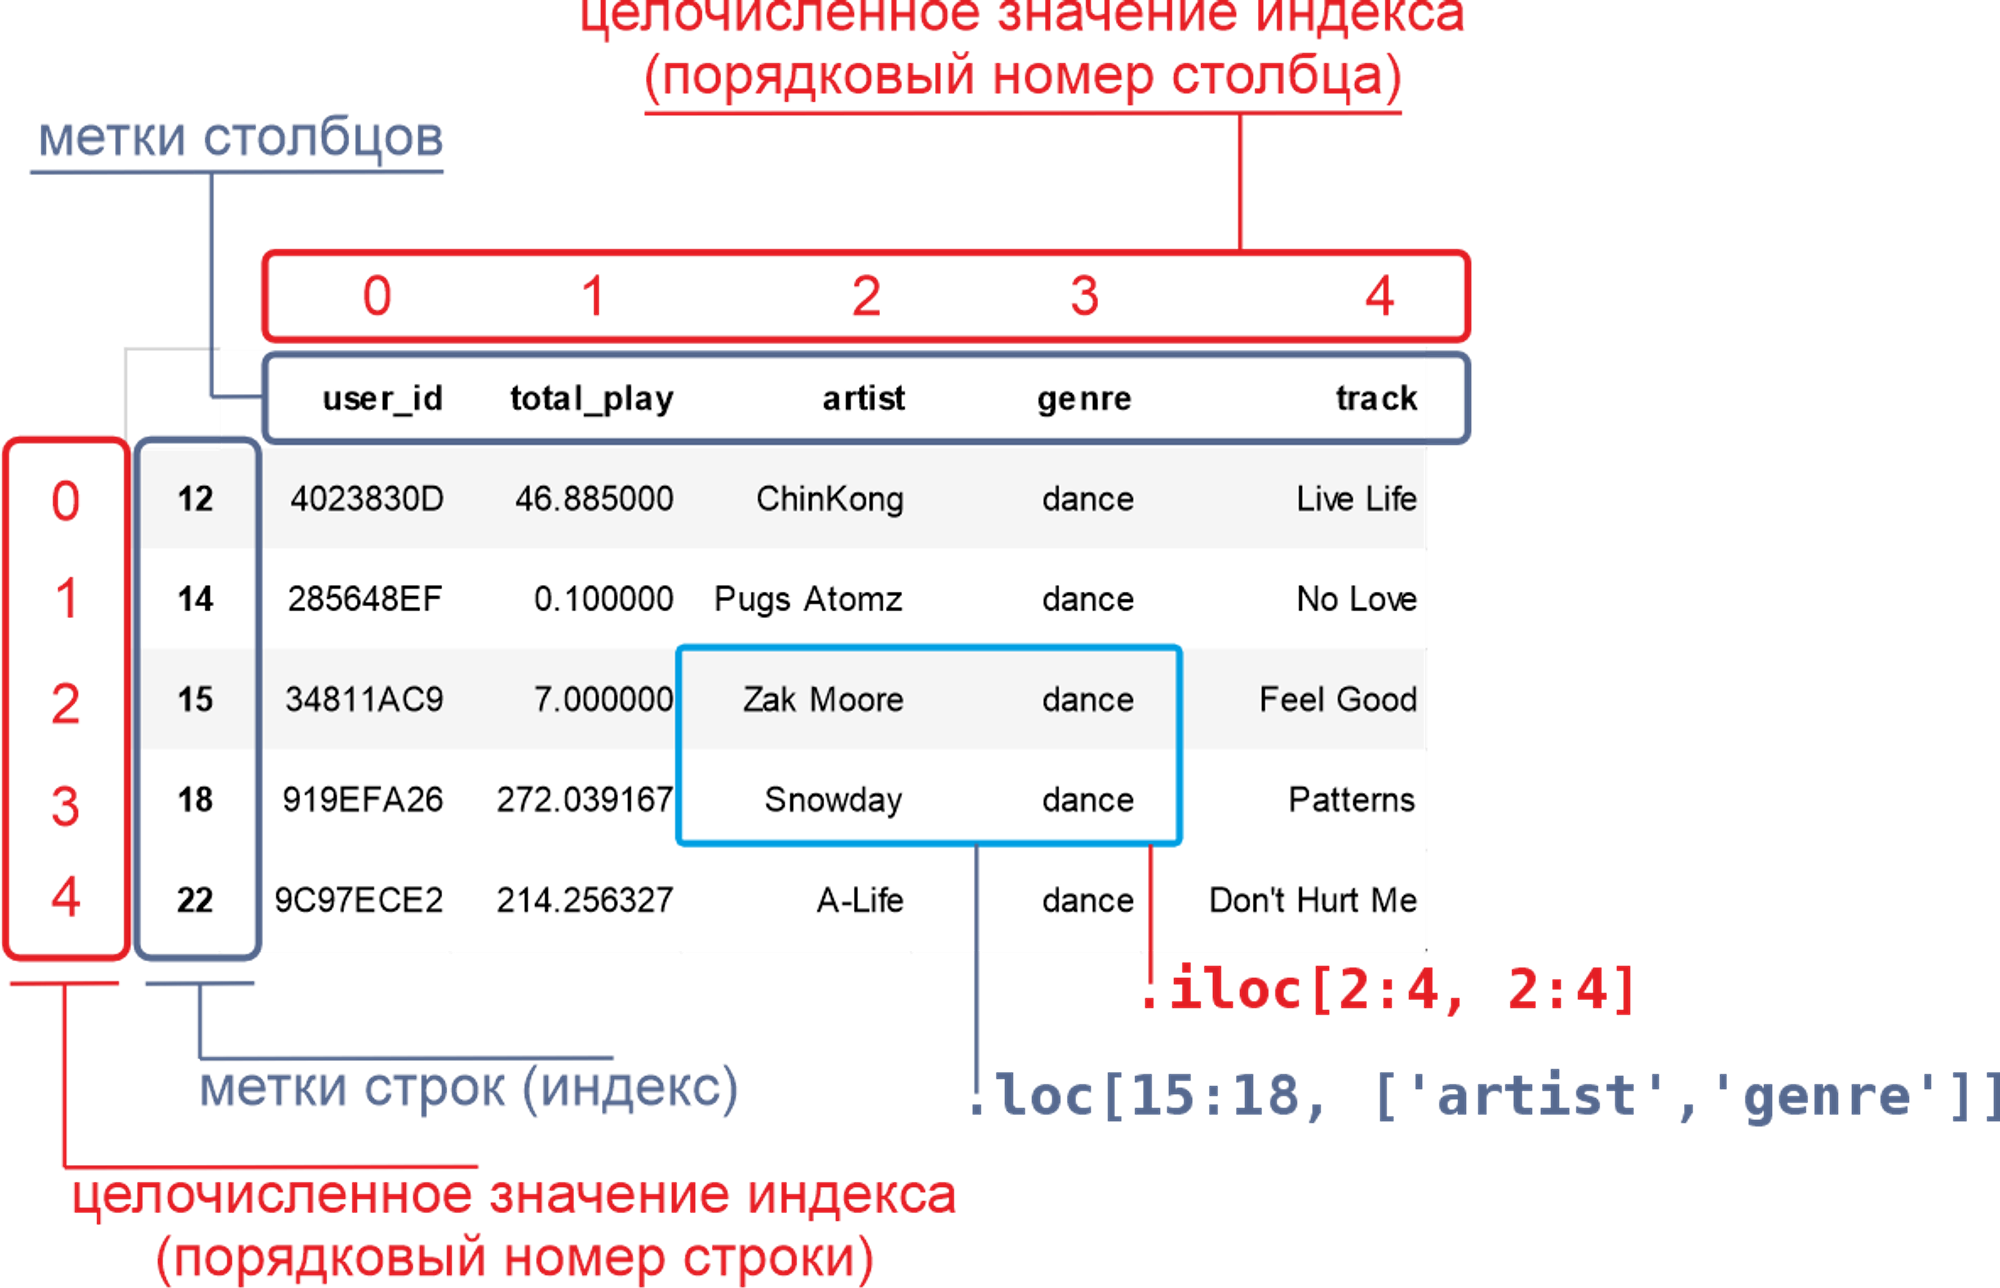

## Сравнение методов выборки данных в pandas  

| **Выборка (срез)**               | **Оператор `[]`**                     | **Оператор `.loc[]`**                     | **Оператор `.iloc[]`**                     |
|-----------------------------------|---------------------------------------|--------------------------------------------|--------------------------------------------|
| **Один столбец**                   | `df['column']`                        | `.loc[:, 'column']`                       | `.iloc[:, index]`                          |
| **Несколько столбцов**             | `df[['column_A','column_B']]`         | `.loc[:, ['column_A','column_B']]`         | `.iloc[:, [index_1, index_2]]`             |
| **Срез столбцов**                  | —                                     | `.loc[:, 'column_A':'column_B']`           | `.iloc[:, index_1:index_2]`                |
| **Одна строка**                    | `df[4:5]`                            | `.loc[4]`                                 | `.iloc[4]`                                 |
| **Все строки, начиная с заданной** | `df[0:]`                             | `.loc[0:]`                                | `.iloc[0:]`                                |
| **Все строки до заданной**         | `df[:5]` (не включая 5)               | `.loc[:5]` (включая 5)                    | `.iloc[:5]` (не включая 5)                 |
| **Срез строк**                     | `df[2:5]` (не включая 5)             | `.loc[2:5]` (включая 5)                   | `.iloc[2:5]` (не включая 5)                |
| **Несколько строк (не последовательный срез)** | —                     | `.loc[[2,4,6]]`                           | `.iloc[[2,4,6]]`                           |
| **Одна ячейка**                    | `df[4:5]['column']`                  | `.loc[4, 'column']`                       | `.iloc[4, index]`                          |

---

### Особенности методов  
1. **Оператор `[]`**:  
   - **Столбцы**: работает только с **метками**.  
   - **Строки**: использует **целочисленные индексы**, но **не поддерживает** логические условия или непоследовательные срезы[1][7].  

2. **`.loc[]`**:  
   - **Столбцы**: работает с **метками** и **интервалами** (например, `column_A:column_B`).  
   - **Строки**: поддерживает **логические условия** (например, `df['age'] > 25`) и **нечисловые метки**[1][5].  
   - **Срезы**: **включают конечную метку** (например, `loc[2:5]` → строки 2, 3, **4**, **5**).  

3. **`.iloc[]`**:  
   - **Столбцы**: работает с **позициями** (целые числа).  
   - **Строки**: **исключает конечную позицию** (например, `iloc[2:5]` → строки 2, 3, **4**).  
   - **Эффективность**: быстрее для больших данных, так как не требует поиска меток.  


## .loc[] и илогические выражения

In [51]:
# подключимся к датасету о продажах
sales = pd.read_csv('datasets/sales.csv')

# взглянем на данные
display(sales.sample(5))

# познакомимся подробнее
sales.info()

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
124,3445,PG1,1594,5.61,13.29,100,418
615,2647,PG5,4371,5.04,9.49,91,330
476,7727,PG3,764,437.21,593.66,38,146
834,2930,PG4,3080,8.99,23.74,236,756
878,5490,PG6,275,12.65,10.44,18,87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_code      1000 non-null   int64  
 1   product_group     1000 non-null   object 
 2   stock_qty         1000 non-null   int64  
 3   cost              1000 non-null   float64
 4   price             1000 non-null   float64
 5   last_week_sales   1000 non-null   int64  
 6   last_month_sales  1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


In [52]:
# создадим маску по группе товара
sales_mask = sales['product_group'] == 'PG2'

# взглянем на маску
display(sales_mask.sample(5))

478    False
424    False
917    False
831    False
992    False
Name: product_group, dtype: bool

In [53]:
# применим маску в методе .loc[]
display(sales.loc[sales_mask, ['product_group', 'product_code', 'price']])

,product_group,product_code,price
0,PG2,4187,569.91
1,PG2,4195,712.41
2,PG2,4204,854.91
3,PG2,4219,1034.55
4,PG2,4718,26.59
...,...,...,...
973,PG2,6341,18.99
979,PG2,2218,16.14
980,PG2,2219,16.14
997,PG2,952,61.74


In [54]:
# модифицируем маску, чтобы использовать несколько условий
sales_mask = (sales['product_group'] == 'PG2') & (sales['price'] >= 100)

# применим маску к данным и отсортируем данные по возрастанию цены
display(sales.loc[sales_mask, ['product_group', 'product_code', 'price']].sort_values(by = 'price'))

,product_group,product_code,price
28,PG2,4003,132.91
27,PG2,3997,132.91
513,PG2,8489,142.41
512,PG2,8488,170.91
588,PG2,1429,170.91
587,PG2,1428,180.41
589,PG2,1430,189.91
827,PG2,8693,360.91
828,PG2,8695,379.91
826,PG2,8692,446.41


## Фильтрация при помощи метода .query()

Синтаксис: ```DataFrame.query(expr, inplace=False)```  
* **expr** (обязательный): Строка с логическим выражением для фильтрации данных. Используются имена столбцов и значения DataFrame.  
* **inplace** (опционально): Если True, изменения применяются к исходному DataFrame. По умолчанию False (возвращает новый DataFrame).

* Внутри строки можно использовать Python-операторы (**and, or, not**).  
* Для обращения к внешним переменным используется символ @.  
* Метод работает быстрее, чем использование масок через ```df[condition]```, особенно для больших DataFrame.
* В запросе можно использовать различные операции сравнения: **!=, >, >=, <, <=**, а также математические вычисления.  

In [55]:
# продемонстрируем пример простой фильтрации
display(sales.query('price > 100').sort_values(by = 'price').head(10))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
443,2751,PG5,386,62.83,104.41,20,75
445,2756,PG5,323,62.83,104.41,23,56
329,4123,PG4,4915,76.31,104.41,157,522
790,5145,PG3,1925,73.15,104.41,70,303
564,5412,PG5,848,79.73,104.41,26,80
610,7154,PG5,313,55.00,104.41,31,91
547,2664,PG5,1180,87.92,104.41,59,107
554,9835,PG5,39,61.44,104.41,13,22
760,2671,PG5,426,87.92,104.41,13,74
697,2605,PG5,566,55.00,104.41,24,96


In [56]:
# вариант сложной фильтрации
display(sales.query('product_code == 2751 and product_group == "PG5"'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
443,2751,PG5,386,62.83,104.41,20,75


In [57]:
# а теперь вариант с использованием внешнйо переменной

# задаем переменную
t = int(100)

#применяем метод .query()
display(sales.query('price > @t').sort_values(by = 'price'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
443,2751,PG5,386,62.83,104.41,20,75
445,2756,PG5,323,62.83,104.41,23,56
329,4123,PG4,4915,76.31,104.41,157,522
790,5145,PG3,1925,73.15,104.41,70,303
564,5412,PG5,848,79.73,104.41,26,80
...,...,...,...,...,...,...,...
3,4219,PG2,241,869.69,1034.55,14,45
599,1941,PG1,213,847.00,1177.05,18,72
710,4140,PG1,92,803.00,1201.75,12,24
565,7773,PG1,602,975.70,1325.16,19,60


### Особенности фильтрации данных с помощью .query()

#### Использование списков в условиях. Операторы ```in``` и ```not in```

In [58]:
# создадим список кодов
t_list = [4219, 1941, 4140, 7773, 9692]

# применим список в методе .query()
display(sales.query('product_code in @t_list'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
3,4219,PG2,241,869.69,1034.55,14,45
528,9692,PG1,68,1243.00,1500.05,26,94
565,7773,PG1,602,975.70,1325.16,19,60
599,1941,PG1,213,847.00,1177.05,18,72
710,4140,PG1,92,803.00,1201.75,12,24


In [59]:
# по аналогии но с противоположным результатом отработает not in
display(sales.query('product_code not in @t_list').sample(5))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
742,9964,PG4,813,8.75,20.89,28,105
670,1476,PG4,541,6.39,14.24,23,94
876,5487,PG6,502,12.54,10.44,35,111
283,7501,PG4,4275,8.28,15.19,24,79
647,4605,PG4,1001,14.93,28.49,53,153


#### Использование метки индекса строк

In [60]:
# В запросе query() можно обращаться к индексу датафрейма, используя ключевое слово index
display(sales.query('index < 6'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88
3,4219,PG2,241,869.69,1034.55,14,45
4,4718,PG2,1401,12.54,26.59,50,285
5,5630,PG4,287,5.85,7.59,24,116


In [61]:
# теперь попробуем вернуть диапазон строк
display(sales.query('5 < index < 11'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
6,5631,PG4,262,9.56,10.44,35,130
7,5634,PG4,205,14.15,18.04,14,53
8,2650,PG4,239,59.40,111.06,15,38
9,5647,PG4,352,5.85,13.29,37,108
10,5649,PG4,360,6.26,13.29,32,79


In [62]:
# можно адресно указать необходимые индексы
display(sales.query('index in [0, 1, 2]'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
0,4187,PG2,498,420.76,569.91,13,58
1,4195,PG2,473,545.64,712.41,16,58
2,4204,PG2,968,640.42,854.91,22,88


#### Использование методов pandas

In [63]:
# используя метод .query давайте вернем строки, где цена выше среднего значения
display(sales.query('price > price.mean()').sample(5).sort_values(by = 'price'))

,product_code,product_group,stock_qty,cost,price,last_week_sales,last_month_sales
471,1131,PG1,455,30.80,68.39,23,84
190,7510,PG5,1301,44.00,113.91,22,69
783,723,PG6,693,236.50,318.16,34,149
721,4148,PG1,255,405.10,612.66,18,39
529,9693,PG1,373,480.14,812.16,18,54


#### Сочетание query() с оператором [] для фильтрации по столбцам и строкам

In [64]:
# метод .query() спокойно комбинируется с []
display(sales.query('price > price.mean()')[['product_code', 'price']].sort_values(by = 'price'))


,product_code,price
471,1131,68.39
694,5311,68.39
724,5698,68.39
161,1660,69.34
222,2589,69.34
...,...,...
3,4219,1034.55
599,1941,1177.05
710,4140,1201.75
565,7773,1325.16


Если названия столбцов содержат специальные символы, пробелы или совпадают с ключевыми словами Python, их нужно экранировать с помощью обратных кавычек (`) в методе `.query()`.

**Кратко о правилах:**

- **Проблемные символы в названиях столбцов:**
  - Пробелы (`column name`).
  - Операторы сравнения (`<`, `>`, `==`, и т.д.).
  - Математические операторы (`+`, `-`, `/`, `*`).
  - Символы: `.`, `,`, `$`, `&`, `!`, `^`.
  - Скобки: `()`, `[]`.

- **Ключевые слова Python:**
  - Например, если название столбца совпадает с ключевым словом Python, например, `class`, `for`, `if`.

- **Как использовать такие названия:**
  - Оборачивайте такие названия столбцов в обратные кавычки (`` ` ``).

# Изменение данных в соответствии с условиями задачи

## Действия над названиями столбцов

In [65]:
emp = pd.read_csv('datasets/emp.csv')
display(emp.head())
print(emp.info())

,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,Sara,Mcguire,Female,tsharp@example.net,(971)643-6089x9160,17-08-21,"Editor, commissioning"
1,2,Alisha,Hebert,Male,vincentgarrett@example.net,+1-114-355-1841x78347,28-06-69,Broadcast engineer
2,3,Gwendolyn,Sheppard,Male,mercadojonathan@example.com,9017807728,25-09-15,Industrial buyer
3,4,Kristine,Mccann,Female,lindsay55@example.com,+1-607-333-9911x59088,27-07-78,Multimedia specialist
4,5,Bobby,Pittman,Female,blevinsmorgan@example.com,3739847538,17-11-89,Planning and development surveyor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          10000 non-null  int64 
 1   First Name     10000 non-null  object
 2   Last Name      10000 non-null  object
 3   Sex            10000 non-null  object
 4   Email          10000 non-null  object
 5   Phone          10000 non-null  object
 6   Date of birth  10000 non-null  object
 7   Job Title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB
None


### Атрибут датафрейма ```columns```

In [66]:
# Используя атрибут .columns выведем список названий всех полей
print(emp.columns)

Index(['Index', 'First Name', 'Last Name', 'Sex', 'Email', 'Phone',
       'Date of birth', 'Job Title'],
      dtype='object')


In [67]:
# можно вернуть их в виде списка
col_list = emp.columns.to_list()

print(col_list)

['Index', 'First Name', 'Last Name', 'Sex', 'Email', 'Phone', 'Date of birth', 'Job Title']


In [68]:
# создадим второй список названий полей и приведем их к skane case
new_col_list = ['index', 'first_name', 'last_name', 'sex', 'email', 'phone', 'date_of_birth', 'job_title']

print(new_col_list)

['index', 'first_name', 'last_name', 'sex', 'email', 'phone', 'date_of_birth', 'job_title']


In [69]:
# применим к названиям столбцов новые, в snake case
emp.columns = new_col_list

# убедимся, что выполнено успешно
display(emp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10000 non-null  int64 
 1   first_name     10000 non-null  object
 2   last_name      10000 non-null  object
 3   sex            10000 non-null  object
 4   email          10000 non-null  object
 5   phone          10000 non-null  object
 6   date_of_birth  10000 non-null  object
 7   job_title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


None

In [70]:
# изменим название не всех а одного столбца

# получаем список имен столбцов
col = emp.columns.to_list()

# определяем новое имя поля
col[5] = 'phone_num'

# переименовываем столбцы 
emp.columns = col

# убедимся, что выполнено успешно
display(emp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10000 non-null  int64 
 1   first_name     10000 non-null  object
 2   last_name      10000 non-null  object
 3   sex            10000 non-null  object
 4   email          10000 non-null  object
 5   phone_num      10000 non-null  object
 6   date_of_birth  10000 non-null  object
 7   job_title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


None

### Метод .rename()

In [71]:
# подключаем DF
emp2 = pd.read_csv('datasets/emp.csv')

# Смотрим на названия столбцов
display(emp2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          10000 non-null  int64 
 1   First Name     10000 non-null  object
 2   Last Name      10000 non-null  object
 3   Sex            10000 non-null  object
 4   Email          10000 non-null  object
 5   Phone          10000 non-null  object
 6   Date of birth  10000 non-null  object
 7   Job Title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


None

In [72]:
# используя аргумент columns метогда .rename передаем словарь, 
# где ключ - старое значение
# а значение - новое занчение
emp2.rename(columns = {
    'Index' : 'index',
    'First Name' : 'first_name'
}, inplace = True)

# вновь смотрим на названия столбцов
display(emp2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10000 non-null  int64 
 1   first_name     10000 non-null  object
 2   Last Name      10000 non-null  object
 3   Sex            10000 non-null  object
 4   Email          10000 non-null  object
 5   Phone          10000 non-null  object
 6   Date of birth  10000 non-null  object
 7   Job Title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


None

### Перевод названия столбцов в Snake Case

In [73]:
# приведем к snake case названия столбцов

emp2.columns = emp2.columns.str.lower().str.replace(' ', '_')

display(emp2.info())

# В Pandas доступ к строковым методам для работы с элементами Series или DataFrame 
# осуществляется через аксессор str.
# Это специальный интерфейс, который позволяет применять строковые операции к каждому 
# элементу столбца, даже если он содержит NaN (пропущенные значения).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10000 non-null  int64 
 1   first_name     10000 non-null  object
 2   last_name      10000 non-null  object
 3   sex            10000 non-null  object
 4   email          10000 non-null  object
 5   phone          10000 non-null  object
 6   date_of_birth  10000 non-null  object
 7   job_title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


None

In [74]:
# выполним тоже самое но используя цикл

# Зададим данные для датафрейма: названия столбцов и содержание строк:
columns = ['Product ID', 'Category', 'Description', 'Price']
data = [[10001, 'Телефоны','Смартфон', 15999],
       [10002, 'Компьютеры', 'Монитор', 17200],
       [10003, 'Кухонная техника', 'Микроволновка', 6350]]

# Создадим новый датафрейм df:
df = pd.DataFrame(data=data, columns=columns)

dict = {}

for column in columns:
    dict[column] = column.lower().replace(' ', '_') 

df.rename(columns = dict, inplace = True)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   3 non-null      int64 
 1   category     3 non-null      object
 2   description  3 non-null      object
 3   price        3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 228.0+ bytes


None

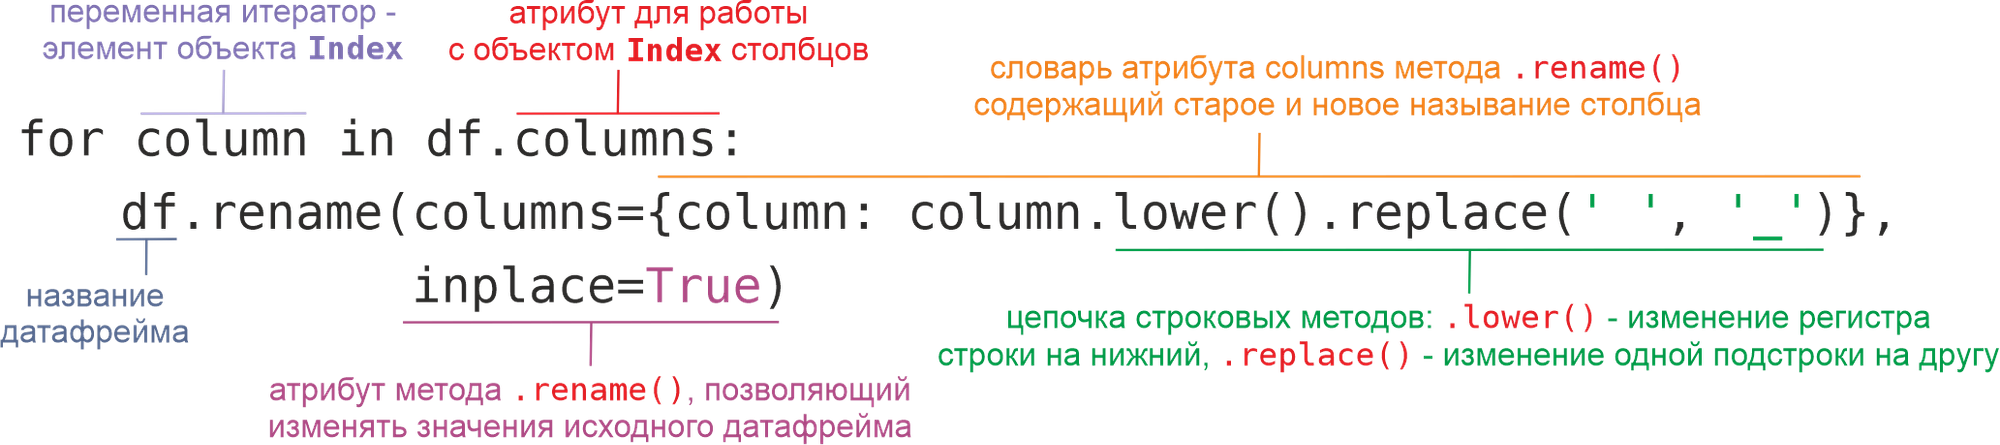

### Изменение названия столбцов с помощью аксессора ```str```

Аксессор .str (от англ. accessor — средство доступа и str сокр. от string — строка) внутренний метод pandas, дающий доступ к данным Series или Index строковым методам.

In [87]:
emp = pd.read_csv('datasets/emp.csv')

emp.columns = emp.columns.str.lower().str.replace(' ', '_')

display(emp.head())

,index,first_name,last_name,sex,email,phone,date_of_birth,job_title
0,1,Sara,Mcguire,Female,tsharp@example.net,(971)643-6089x9160,17-08-21,"Editor, commissioning"
1,2,Alisha,Hebert,Male,vincentgarrett@example.net,+1-114-355-1841x78347,28-06-69,Broadcast engineer
2,3,Gwendolyn,Sheppard,Male,mercadojonathan@example.com,9017807728,25-09-15,Industrial buyer
3,4,Kristine,Mccann,Female,lindsay55@example.com,+1-607-333-9911x59088,27-07-78,Multimedia specialist
4,5,Bobby,Pittman,Female,blevinsmorgan@example.com,3739847538,17-11-89,Planning and development surveyor


## Методы замены данных по условию

In [95]:
# создадим DataFrame

# Зададим данные для датафрейма: названия столбцов и содержание строк:
columns = ['category', 'id', 'group', 'price', 'rating', 'votes']
data = [['Электроника', 1826254, 'Смартфоны', 14297, 4.8, 1536],
        ['Смартфоны', 1832281, 'Смартфоны', 32690, 4.9, 186],
        ['Электроника', 2338051, 'Мобильный телефон', 817, 37, 88],
        ['Электроника', 6757637, 'Умные часы', 1287, 4.5, 121],
        ['Бытовая техника', 1777135, 'Микроволновая печь', 5206, 4.9, 25],
        ['Компьютерная техника', 1774907, 'Ноутбук', 91200, 4.8, 98],
        ['Компьютерная техника', 1879698, 'Планшет', 30290, 4.9, 749]]

# Создадим новый датафрейм df:
df = pd.DataFrame(data = data, columns = columns)
print(df) 

               category       id               group  price  rating  votes
0           Электроника  1826254           Смартфоны  14297     4.8   1536
1             Смартфоны  1832281           Смартфоны  32690     4.9    186
2           Электроника  2338051   Мобильный телефон    817    37.0     88
3           Электроника  6757637          Умные часы   1287     4.5    121
4       Бытовая техника  1777135  Микроволновая печь   5206     4.9     25
5  Компьютерная техника  1774907             Ноутбук  91200     4.8     98
6  Компьютерная техника  1879698             Планшет  30290     4.9    749


### .replace()

синтаксис  
```DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False)```

**Ключевые атрибуты:**    
* ```to_replace``` — определяет заменяемые значения (скаляр, список, словарь, регулярное выражение или None).  

* ```value``` — указывает новые значения (поддерживает те же типы, что и to_replace).  

* ```inplace``` — флаг для замены на месте без создания копии (False по умолчанию).  

* ```limit``` — устаревший параметр (начиная с версии 2.1.0), ранее ограничивал количество замен.  

* ```regex``` — флаг для интерпретации to_replace и value как регулярных выражений (False по умолчанию).  

**Особенности работы:**

* При использовании словаря замена происходит по ключам-значениям.  

* Для регулярных выражений ```regex = True``` позволяет искать шаблоны в текстовых данных.  

* Если ```value = None```, замена зависит от типа ```to_replace``` (например, словарь или список)  

In [99]:
df

,category,id,group,price,rating,votes
0,Электроника,1826254,Смартфоны,14297,4.8,1536
1,Смартфоны,1832281,Смартфоны,32690,4.9,186
2,Электроника,2338051,Мобильный телефон,817,37.0,88
3,Электроника,6757637,Умные часы,1287,4.5,121
4,Бытовая техника,1777135,Микроволновая печь,5206,4.9,25
5,Компьютерная техника,1774907,Ноутбук,91200,4.8,98
6,Компьютерная техника,1879698,Планшет,30290,4.9,749


In [102]:
# произведем замену названия категорий в конкретном столбце
df['category'].replace('Электроника', 'electronics', inplace = True)

display(df)

C:\Users\user\AppData\Local\Temp\ipykernel_18900\4256339801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].replace('Электроника', 'electronics', inplace = True)


,category,id,group,price,rating,votes
0,electronics,1826254,Смартфоны,14297,4.8,1536
1,Смартфоны,1832281,Смартфоны,32690,4.9,186
2,electronics,2338051,Мобильный телефон,817,37.0,88
3,electronics,6757637,Умные часы,1287,4.5,121
4,Бытовая техника,1777135,Микроволновая печь,5206,4.9,25
5,Компьютерная техника,1774907,Ноутбук,91200,4.8,98
6,Компьютерная техника,1879698,Планшет,30290,4.9,749


In [103]:
# мы также можем прозивести замену во всем DataFrame, не указывая конкретное поле

df.replace('Смартфоны', 'electronics', inplace = True)

display(df)

,category,id,group,price,rating,votes
0,electronics,1826254,electronics,14297,4.8,1536
1,electronics,1832281,electronics,32690,4.9,186
2,electronics,2338051,Мобильный телефон,817,37.0,88
3,electronics,6757637,Умные часы,1287,4.5,121
4,Бытовая техника,1777135,Микроволновая печь,5206,4.9,25
5,Компьютерная техника,1774907,Ноутбук,91200,4.8,98
6,Компьютерная техника,1879698,Планшет,30290,4.9,749


In [106]:
# видим, что в поле group произвели замену ошибочно, тк. смартфоны это верная группа

df['group'].replace('electronics', 'Смартфоны', inplace = True)

display(df) # теперь номрально

C:\Users\user\AppData\Local\Temp\ipykernel_18900\2301943595.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['group'].replace('electronics', 'Смартфоны', inplace = True)


,category,id,group,price,rating,votes
0,electronics,1826254,Смартфоны,14297,4.8,1536
1,electronics,1832281,Смартфоны,32690,4.9,186
2,electronics,2338051,Мобильный телефон,817,37.0,88
3,electronics,6757637,Умные часы,1287,4.5,121
4,Бытовая техника,1777135,Микроволновая печь,5206,4.9,25
5,Компьютерная техника,1774907,Ноутбук,91200,4.8,98
6,Компьютерная техника,1879698,Планшет,30290,4.9,749


In [109]:
# используем списки в методе .replace()

old_c = ['Бытовая техника', 'Компьютерная техника']
new_c = ['appliances', 'computers']

# выполним замену с помощью списков в поле category

df['category'].replace(old_c, new_c, inplace = True)

display(df) # смотрим на результат, ок

,category,id,group,price,rating,votes
0,electronics,1826254,Смартфоны,14297,4.8,1536
1,electronics,1832281,Смартфоны,32690,4.9,186
2,electronics,2338051,Мобильный телефон,817,37.0,88
3,electronics,6757637,Умные часы,1287,4.5,121
4,appliances,1777135,Микроволновая печь,5206,4.9,25
5,computers,1774907,Ноутбук,91200,4.8,98
6,computers,1879698,Планшет,30290,4.9,749


In [110]:
# то же можно провернуть используя словарь староке:новое значение

replace_dict = {'Бытовая техника':'appliances',
                'Компьютерная техника':'computers'}

df['category'].replace(replace_dict, inplace = True)

display(df)

,category,id,group,price,rating,votes
0,electronics,1826254,Смартфоны,14297,4.8,1536
1,electronics,1832281,Смартфоны,32690,4.9,186
2,electronics,2338051,Мобильный телефон,817,37.0,88
3,electronics,6757637,Умные часы,1287,4.5,121
4,appliances,1777135,Микроволновая печь,5206,4.9,25
5,computers,1774907,Ноутбук,91200,4.8,98
6,computers,1879698,Планшет,30290,4.9,749


In [ ]:
# объединим ряд групп в одну, создадим список
group_list = ['Смартфоны','Умные часы','Планшет','Мобильный телефон']

# добавим новое поле 
df['new_group'] = df['group'].replace(group_list, 'gadgets')

display(df)

,category,id,group,price,rating,votes,new_group
0,electronics,1826254,Смартфоны,14297,4.8,1536,gadgets
1,electronics,1832281,Смартфоны,32690,4.9,186,gadgets
2,electronics,2338051,Мобильный телефон,817,37.0,88,gadgets
3,electronics,6757637,Умные часы,1287,4.5,121,gadgets
4,appliances,1777135,Микроволновая печь,5206,4.9,25,Микроволновая печь
5,computers,1774907,Ноутбук,91200,4.8,98,Ноутбук
6,computers,1879698,Планшет,30290,4.9,749,gadgets


### Замена данных с помощью индексации